In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from utils import get_signal_by_type

from bokeh.plotting import figure, show, save
from bokeh.layouts import column
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

# Example fit

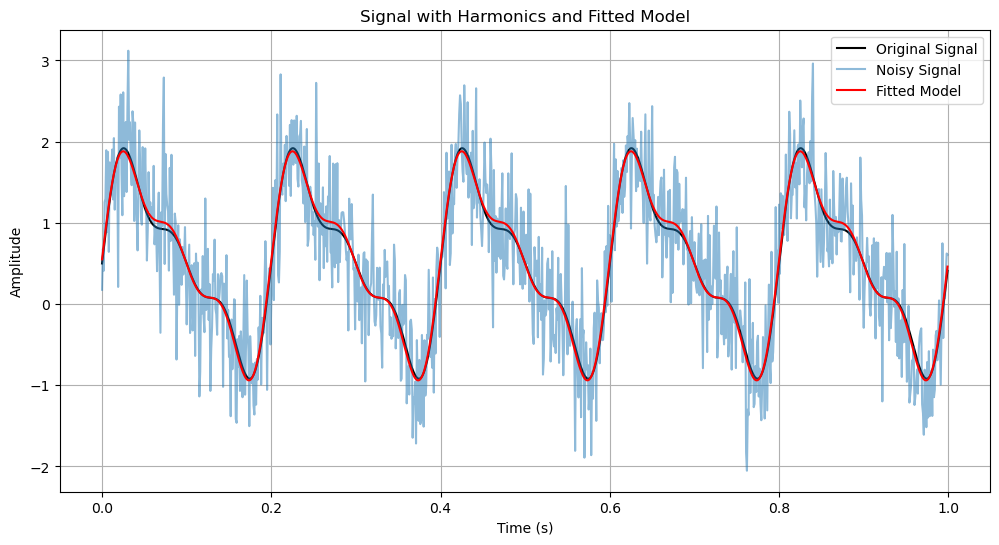

Estimated Parameters:
DC Component (A0): 0.507
Fundamental Amplitude (A1): 1.027
Fundamental Phase (B1): -0.008
2nd Harmonic Amplitude (A2): 0.476
2nd Harmonic Phase (B2): 0.030
3rd Harmonic Amplitude (A3): 0.295
3rd Harmonic Phase (B3): 0.132


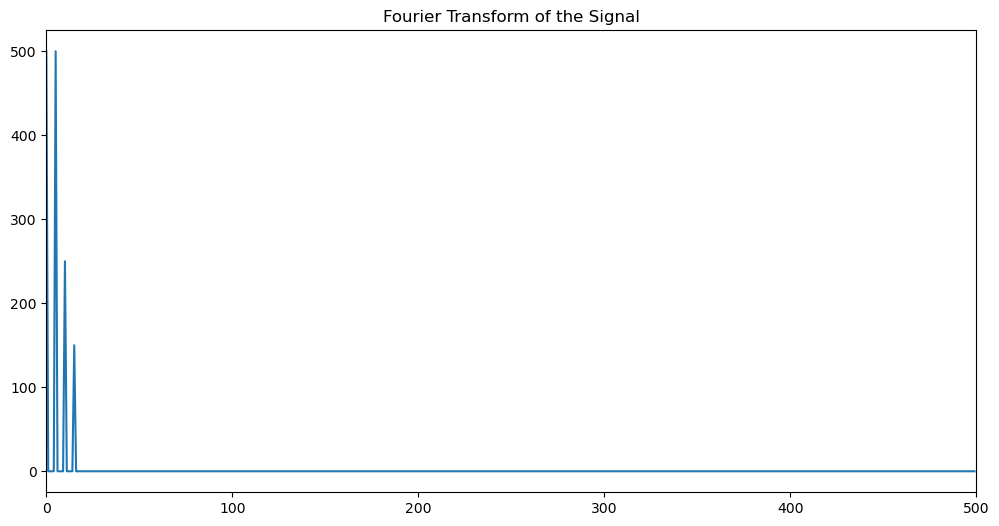

In [2]:

# Step 1: Generate the synthetic signal
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector

# Fundamental frequency and its harmonics
f0 = 5  # Fundamental frequency (Hz)
A0 = 0.5  # DC component
A1 = 1.0  # Amplitude of fundamental
B1 = 0.0  # Phase of fundamental
A2 = 0.5  # Amplitude of 2nd harmonic
B2 = 0.0  # Phase of 2nd harmonic
A3 = 0.3  # Amplitude of 3rd harmonic
B3 = 0.0  # Phase of 3rd harmonic

# Create the signal with harmonics
signal = (A0 +
          A1 * np.sin(2 * np.pi * f0 * t + B1) +
          A2 * np.sin(2 * np.pi * 2 * f0 * t + B2) +
          A3 * np.sin(2 * np.pi * 3 * f0 * t + B3))
# Add noise
noise = 0.5 * np.random.normal(size=t.shape)
noisy_signal = signal + noise

# Step 2: Define the model function for fitting
def model(t, A0, A1, B1, A2, B2, A3, B3):
    return (A0 +
            A1 * np.sin(2 * np.pi * f0 * t + B1) +
            A2 * np.sin(2 * np.pi * 2 * f0 * t + B2) +
            A3 * np.sin(2 * np.pi * 3 * f0 * t + B3))

# Initial guess for the parameters
initial_guess = [0, 1, 0, 0.5, 0, 0.3, 0]

# Fit the model to the noisy signal
params, _ = curve_fit(model, t, noisy_signal, p0=initial_guess)

# Step 3: Plot the original noisy signal and the fitted model
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal', color='black')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, model(t, *params), label='Fitted Model', color='red')
plt.title('Signal with Harmonics and Fitted Model')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

from scipy.fftpack import fft
f = fft(signal)
f = np.abs(f)
plt.figure(figsize=(12, 6))
plt.title("Fourier Transform of the Signal")
plt.xlim(0, 500)
plt.plot(np.arange(len(f)//2), f[:len(f)//2])

# Print estimated parameters
print("Estimated Parameters:")
print(f"DC Component (A0): {params[0]:.3f}")
print(f"Fundamental Amplitude (A1): {params[1]:.3f}")
print(f"Fundamental Phase (B1): {params[2]:.3f}")
print(f"2nd Harmonic Amplitude (A2): {params[3]:.3f}")
print(f"2nd Harmonic Phase (B2): {params[4]:.3f}")
print(f"3rd Harmonic Amplitude (A3): {params[5]:.3f}")
print(f"3rd Harmonic Phase (B3): {params[6]:.3f}")


# Find clear template in real data

In [3]:
eye_experiment_sa_start = {'2D': 
                        {1:{'TTX': 0, 'stimulated': 0},
                        2:{'TTX': 0, 'stimulated': 0},
                        3:{'TTX': 0, 'stimulated': 0},
                        4:{'TTX': 0, 'stimulated': 0},
                        5:{'TTX': 0, 'stimulated': 0},
                        6:{'TTX': 0, 'stimulated': 0},
                        },
                        '3D':                        
                        {1:{'TTX': 1900, 'stimulated': 905},
                        2:{'TTX': 1760, 'stimulated': 430},
                        3:{'TTX': 2800, 'stimulated': 1850},
                        4:{'TTX': 600, 'stimulated': 480},
                        5:{'TTX': 280, 'stimulated': 2635},
                        6:{'TTX': 1380, 'stimulated': 1455},
                        }
                        }

In [4]:
stim_length= 300
segment_length= 3000

from bokeh.palettes import magma


p = figure(title = 'All response periods, TTX', width=1200, height=600, y_range=(-300, 300))


colors = magma(100)

X = []

channel = 0
for i in [6]:
    print(i)
    time, signal = get_signal_by_type(eye=i, design="3D", experiment='TTX', verbose=False)
    first_stim = eye_experiment_sa_start['3D'][i]['TTX']

    signal = signal[first_stim:, channel]
    time = time[first_stim:]
    offset = -2
    for j in range(99):
        segment = signal[ j*segment_length + stim_length + offset*j: (j+1)*segment_length + offset*j]
        X.append(segment)
        p.line(np.arange(len(segment)), segment, alpha=0.1, color=colors[j])

# make 50 Hz sine wave on fs = 30000 for 2700 samples

fs = 30000
f0 = 50
t = np.linspace(0, 2700/fs, 2700, endpoint=False)

phase_shift_time = 0.003 # seconds
phase_shift = 2 * np.pi * f0 * phase_shift_time
signal = np.sin(2 * np.pi * f0 * t + phase_shift) 
#plt.plot(signal*200, color='black')

f1 = 100
signal2 = np.sin(2 * np.pi * f0 * t + phase_shift) + np.sin(2 * np.pi * f1 * t + phase_shift)
#plt.plot(signal2*200, color='grey')


show(p)

6


In [6]:
X = np.array(X)
# fit a curve 

def model(t, f0, f1, f2, f3, f4, f5, a0, a1, a2, a3, a4, a5,
          p0, p1, p2, p3, p4, p5, b):
    signal = a0 + np.sin(2 * np.pi * f0 * t + p0) +\
             a1 * np.sin(2 * np.pi * f1 * t + p1) +\
             a2 * np.sin(2 * np.pi * f2 * t + p2) +\
             a3 * np.sin(2 * np.pi * f3 * t + p3) +\
             a4 * np.sin(2 * np.pi * f4 * t + p4) +\
             a5 * np.sin(2 * np.pi * f5 * t + p5) +\
             b
    return signal

t = np.linspace(0, 0.09, 2700, endpoint=False)
f_init = [25, 50, 100, 150, 200, 250]
a_init = [100, 1000, 100, 100, 100, 100]
p_init = [1, 1, 1, 1, 1, 1]
b = 0
params, _ = curve_fit(model, t, X.mean(axis=0), p0=f_init + a_init +  p_init + [b])


def model(t, f0,a0,p0, b):
    signal = a0 + np.sin(2 * np.pi * f0 * t + p0) + b
    return signal

t = np.linspace(0, 0.09, 2700, endpoint=False)
f_init = [100]
a_init = [100]
p_init = [1]
b = 0
params, _ = curve_fit(model, t, X.mean(axis=0), p0=f_init + a_init +  p_init + [b], maxfev=10000)

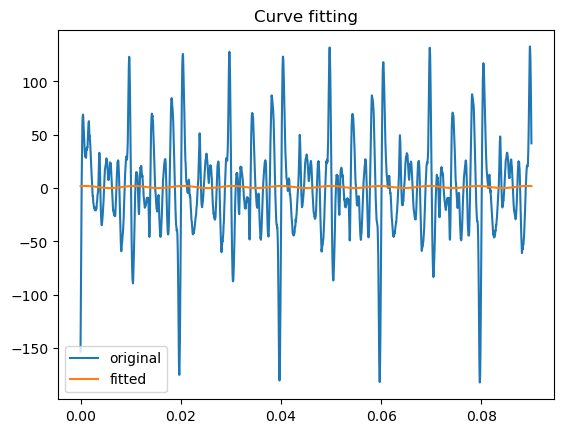

In [7]:
plt.plot(t, X.mean(axis=0), label='original')
plt.title('Curve fitting')
plt.plot(t, model(t, *params), label='fitted')
plt.legend()

# Fit with SARIMA

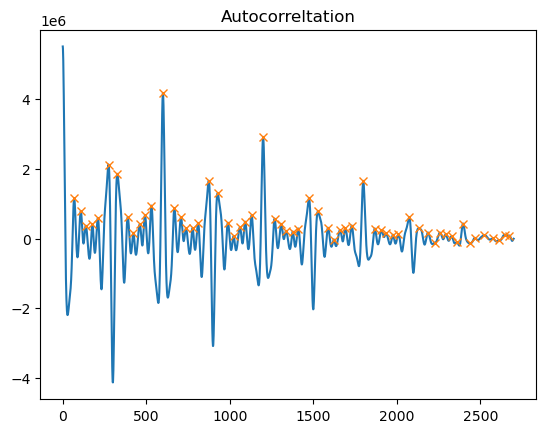

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [14]:
# autocorrelation plot
from scipy.signal import correlate
from scipy.signal import find_peaks
from scipy.signal import peak_prominences

def autocorr(x):
    result = correlate(x, x, mode='full')
    return result[result.size//2:]

autocorr_signal = autocorr(X.mean(axis=0))
peaks, _ = find_peaks(autocorr_signal)
plt.plot(autocorr_signal)
plt.title('Autocorreltation')
plt.plot(peaks, autocorr_signal[peaks], "x")
plt.show()

plt.figure(figsize=(15, 5))


In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
y = X.mean(axis = 0)
# downsample from 30 kHz to 10 kHz
#y = y[::3]

In [18]:
# Define the model
season = 2 # we would need 600, but it is too slow and breaks the kernel
model = SARIMAX(y, 
                order=(1, 1, 1),          # non-seasonal order
                seasonal_order=(1, 1, 1, season)) 

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20290D+00    |proj g|=  2.79889D-01

At iterate    5    f=  2.15917D+00    |proj g|=  1.95081D-03


 This problem is unconstrained.



At iterate   10    f=  2.15756D+00    |proj g|=  6.68117D-02

At iterate   15    f=  2.10593D+00    |proj g|=  1.06260D-01

At iterate   20    f=  2.06324D+00    |proj g|=  2.37098D-02

At iterate   25    f=  2.05882D+00    |proj g|=  1.77299D-03

At iterate   30    f=  2.05834D+00    |proj g|=  1.51130D-03

At iterate   35    f=  2.05829D+00    |proj g|=  4.24303D-04

At iterate   40    f=  2.05828D+00    |proj g|=  2.30350D-04

At iterate   45    f=  2.05828D+00    |proj g|=  2.02425D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     72      1     0     0   1.498D-05   2.058D+00
  F =   2.05827871398


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


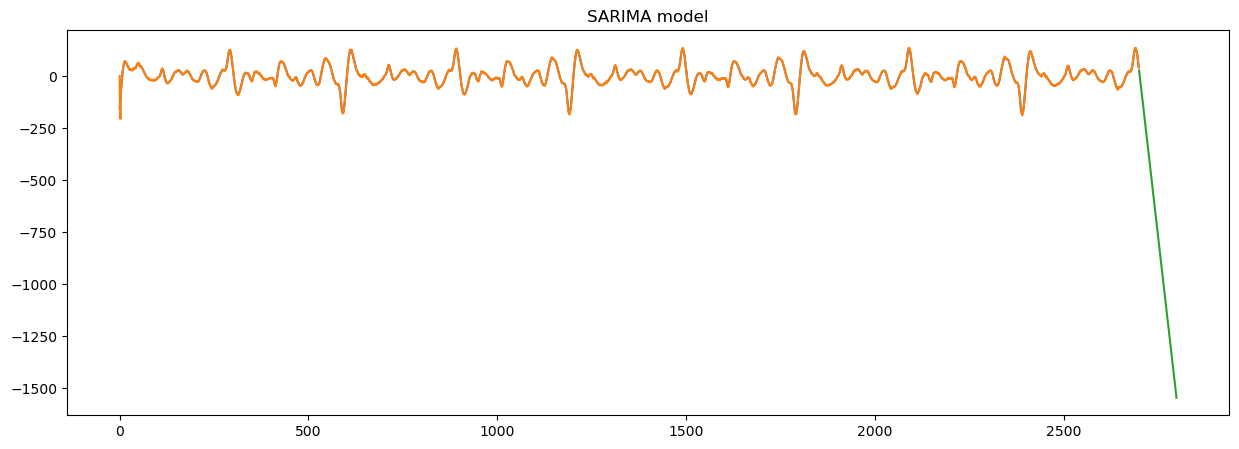

In [22]:
plt.figure(figsize=(15, 5))
plt.title('SARIMA model')
plt.plot(y)
plt.plot(results.fittedvalues)
#plot forecast
forecast = 100
plt.plot(np.arange(2700, 2700+forecast), results.forecast(forecast))


# Other desparate methods

In [8]:
# random desparate trials
plt.plot(y)
#plt.plot(110*np.sin(2 * np.pi * 50 * t + 1.57))
#plt.plot(110*np.sin(2 * np.pi * 100 * t + 1.57))
plt.plot(100*np.sin(2 * np.pi * 50 * t + 1.57) + 100*np.sin(2 * np.pi * 100 * t + 1.57))

NameError: name 'y' is not defined

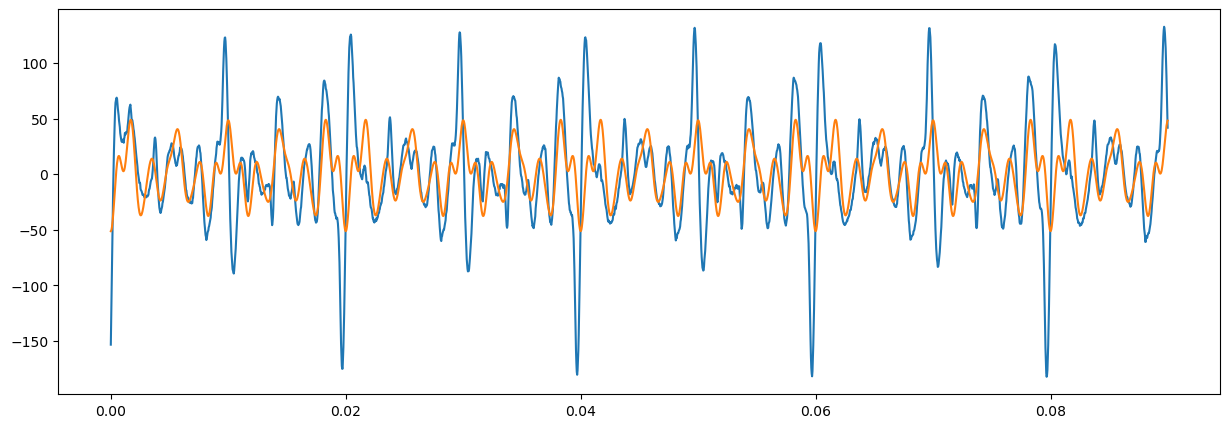

In [9]:
# random desparate linear regression
from numpy.linalg import solve

def design_matrix(t):
    features = []
    for i in range(20):
        features.append(np.sin(2 * np.pi * 50*i * t + np.pi/2))
    return np.stack(features).T

A = design_matrix(t)

def linear_regression(X, y):
    return solve(X.T @ X, X.T @ y)

y = X.mean(axis=0)[:, None]
params = linear_regression(A, y)

plt.figure(figsize=(15, 5))
plt.plot(t, y)
plt.plot(t, (A @ params))
plt.show()



/home/annareisz/miniconda3/envs/mlsp/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


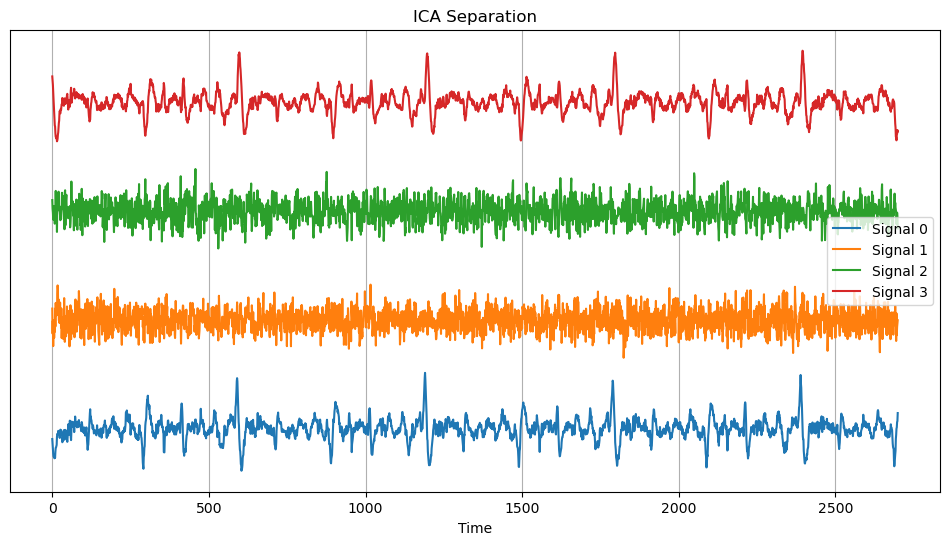

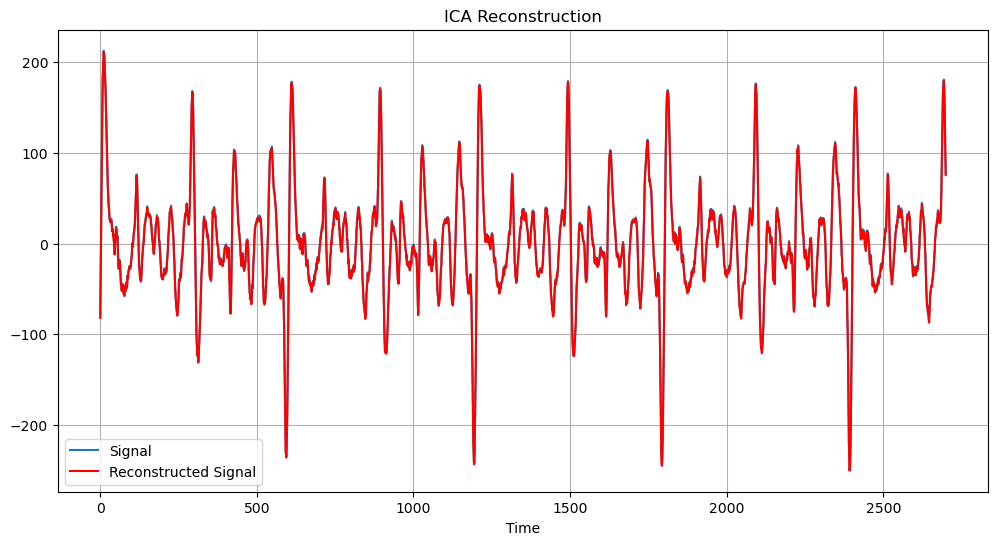

In [10]:
# random desparate ica
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
S_ = ica.fit_transform(X[:10].T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plt.figure(figsize=(12, 6))
#plt.plot(X.mean(axis=0), label='Mixed Signal')
for i in range(ica.n_components):
    plt.plot(S_[:, i] + i*10, label=f'Signal {i}')
plt.title('ICA Separation')
plt.xlabel('Time')
# remove y ticks
plt.yticks([])
plt.legend()
plt.grid()

# reconstruction
plt.figure(figsize=(12, 6))
plt.plot(X[:10].mean(axis=0), label='Signal')
plt.plot((S_ @ A_.T).mean(axis=1), label='Reconstructed Signal', color='red')
plt.title('ICA Reconstruction')
plt.xlabel('Time')
plt.legend()
plt.grid()



# Fourier transform

Prominent peaks at:
[  1   5   8  11  14  18  22  27  31  36  41  49  54  59  63  68  72  77
  82  86  91  95 100 104 108 113 122 126 131 136 139 148 157 166 171 176
 184 203 212]
Diff
[ 4  3  3  3  4  4  5  4  5  5  8  5  5  4  5  4  5  5  4  5  4  5  4  4
  5  9  4  5  5  3  9  9  9  5  5  8 19  9]


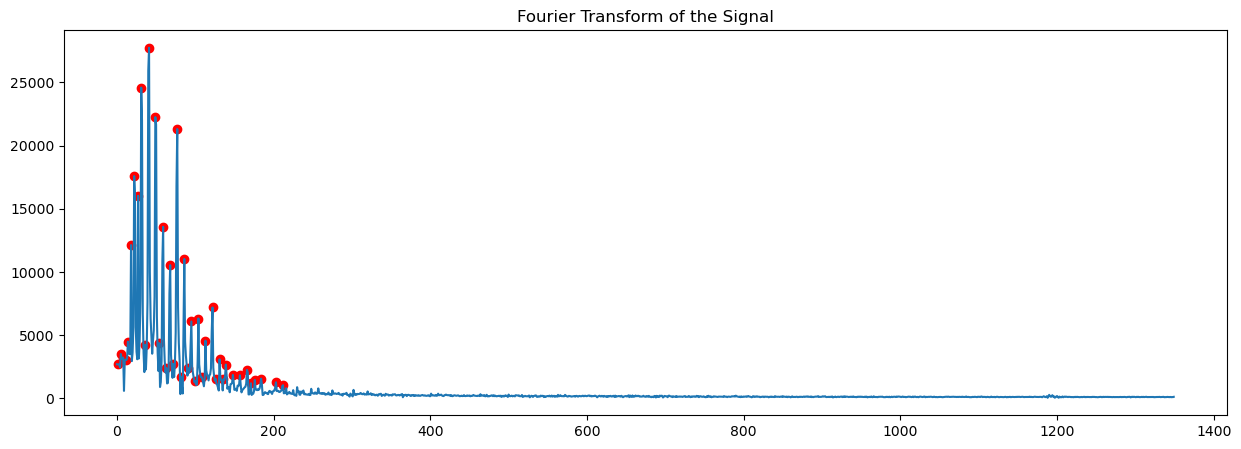

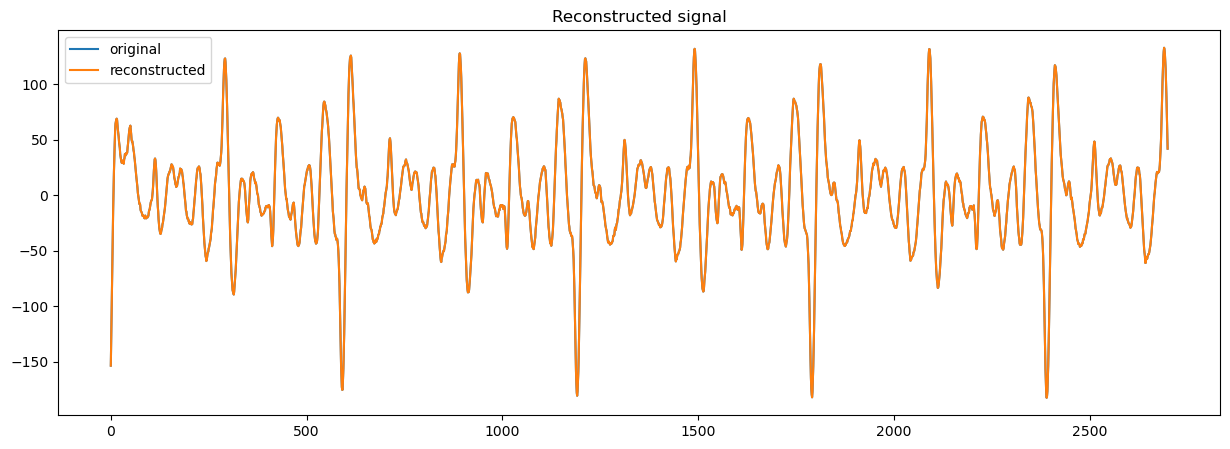

[ True False  True ...  True  True  True]


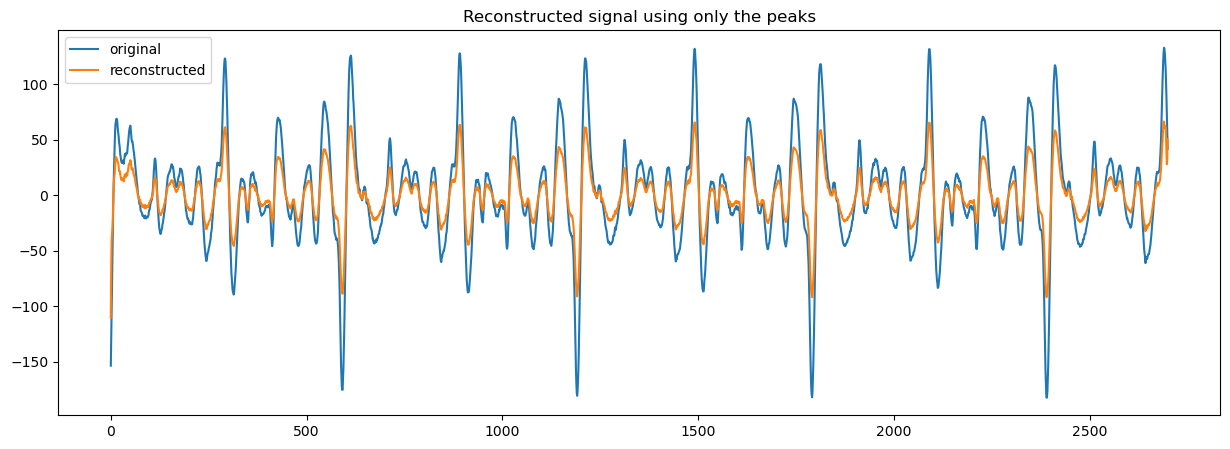

In [11]:

from scipy.fftpack import fft, ifft, dst, idst
from scipy.signal import find_peaks

x = X.mean(axis=0)

plt.figure(figsize=(15, 5))
#plt.xlim(0, 500)
f = fft(x)
fabs = np.abs(f)
plt.plot(np.arange(len(f)//2), fabs[:len(f)//2])
peaks, _ = find_peaks(fabs[:len(f)//2], height=1000)
print("Prominent peaks at:")
print(np.arange(len(fabs)//2)[peaks])
print('Diff')
print(np.diff(np.arange(len(fabs)//2)[peaks]))
plt.title('Fourier Transform of the Signal')
plt.scatter(np.arange(len(fabs)//2)[peaks], fabs[peaks], color='red')
plt.show()

#f[peaks] = 0
#f[-peaks] = 0
plt.figure(figsize=(15, 5))
plt.title('Reconstructed signal')
plt.plot(x, label='original')
plt.plot(ifft(f).real, label='reconstructed')
plt.legend()
plt.show()


# reconstruct only using the peaks 
all_peaks = np.hstack([peaks[:-5], - peaks[:-5], np.array([1200])])

mask = ~np.isin(np.arange(len(f)), all_peaks)
print(mask)
f[:500] = 0
plt.figure(figsize=(15, 5))
plt.title('Reconstructed signal using only the peaks')
plt.plot(x, label='original')
plt.plot(ifft(f).real, label='reconstructed')
plt.legend()
plt.show()




# Find template

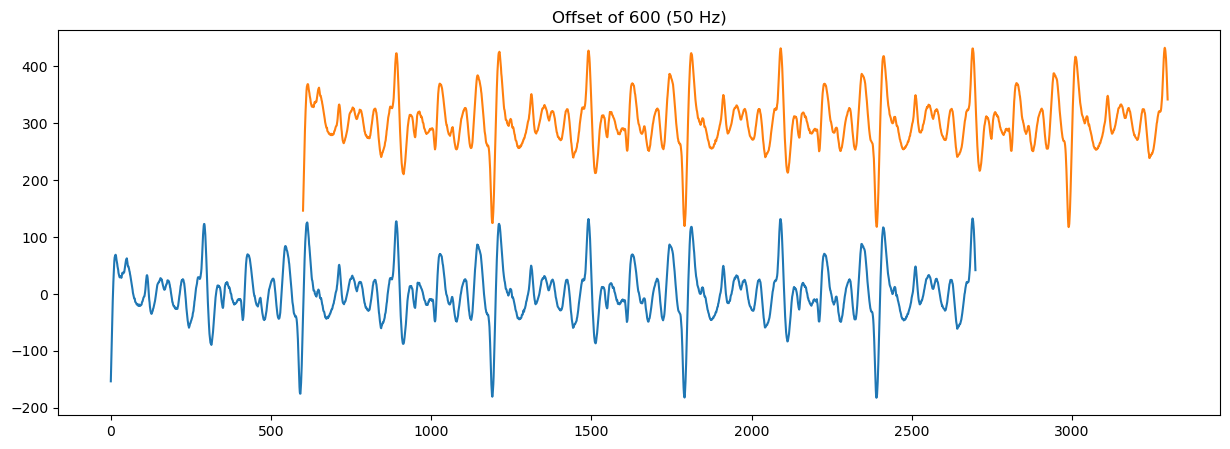

In [12]:
plt.figure(figsize=(15, 5))
plt.title('Offset of 600 (50 Hz)')
plt.plot(y)
plt.plot(np.arange(len(y))+600, y + 300)
plt.show()

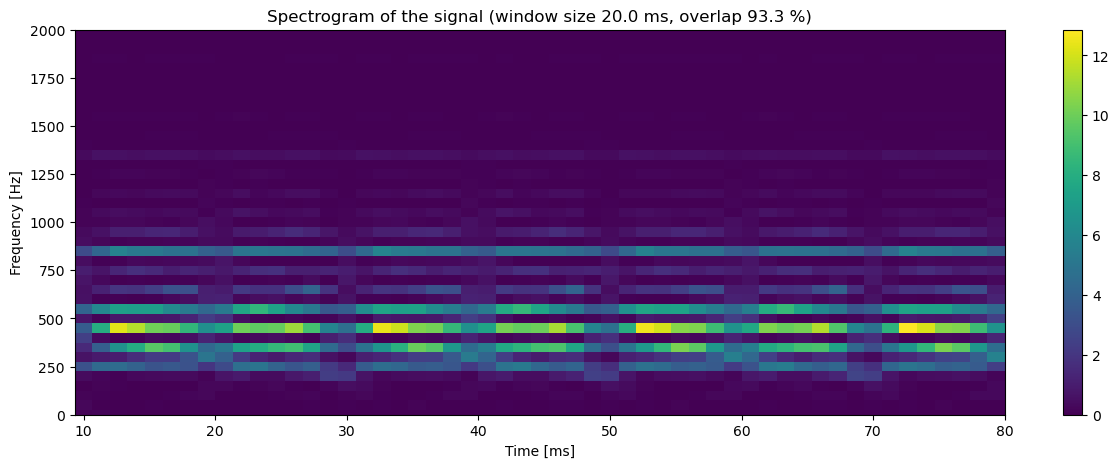

In [13]:
# spectogram of y
from scipy.signal import spectrogram
nperseq = 600
noverlap = 560
f, t, Sxx = spectrogram(y.flatten(), fs=30000, nperseg=nperseq, noverlap=noverlap)
plt.figure(figsize=(15, 5))
plt.ylim(0, 2000)
plt.pcolormesh(t*1000, f, Sxx)
plt.title(f'Spectrogram of the signal (window size {nperseq/fs*1000:.1f} ms, overlap {noverlap/nperseq*100 :.1f} %)')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [ms]')
plt.show()


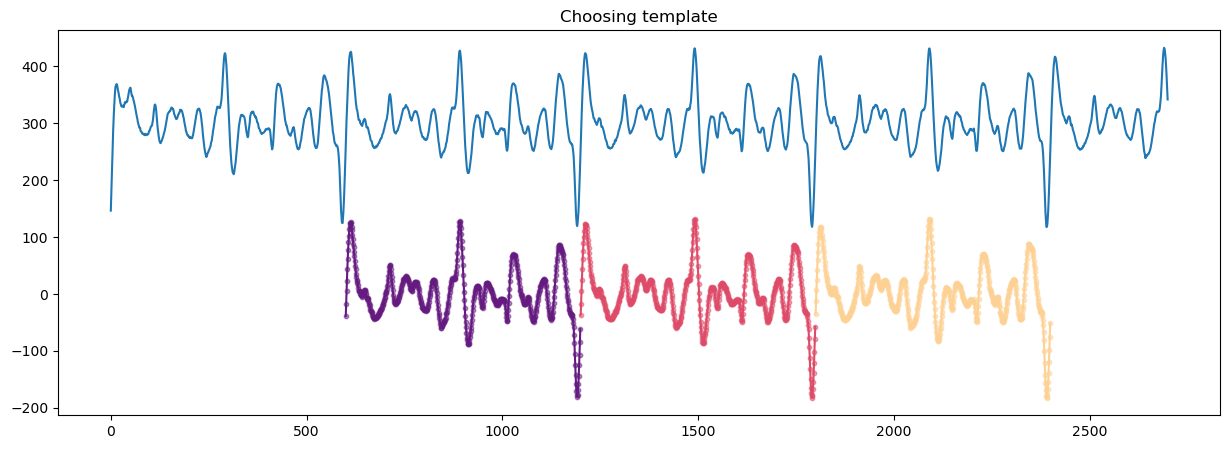

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(y + 300)
plt.title('Choosing template')
template_start= 600
template_length = 600
template_end = template_start + template_length
for i in range(1,4):
    plt.plot(np.arange(len(y))[i*template_start:i*template_start + template_length], 
                             y[i*template_start:i*template_start + template_length], colors[i*30])
    plt.scatter(np.arange(len(y))[i*template_start:i*template_start + template_length], 
                             y[i*template_start:i*template_start + template_length], alpha=0.5, s=10, color=colors[i*30])


plt.show()

/home/annareisz/miniconda3/envs/mlsp/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/annareisz/miniconda3/envs/mlsp/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


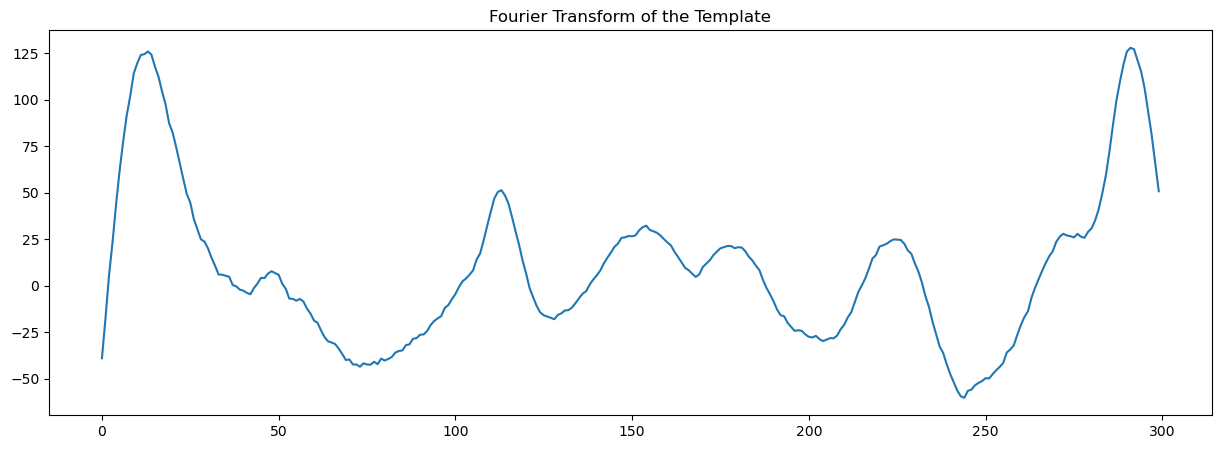

In [15]:
final_template = y[template_start:template_end]
# fourier transform of the template
f = fft(final_template)
fabs = np.abs(f)
plt.figure(figsize=(15, 5))
plt.title('Fourier Transform of the Template')
plt.plot(np.arange(len(f)//2), f[:len(f)//2])
plt.show()

In [213]:
np.save('ME_template.npy', final_template)